## Dependencies and Data

Here before moving into the coding part as always we need to import all the dependencies.

Once that is done, we move on to expressing our dataset.

The dataset has 303 rows and 14 columns.

In [4]:
%matplotlib notebook
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.neural_network import MLPClassifier   #Multi-Layer Perceptron Classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt     
from prettytable import from_csv    #To draw tables

dataset=pd.read_csv('heart.csv')

print("The dataset shape is : ",dataset.shape)     #prints shape of dataset

#drawing the table
with open("heart.csv", "r") as fp: 
    x = from_csv(fp)
    
print(x)

The dataset shape is :  (303, 14)
+--------+-----+----+----------+------+-----+---------+---------+-------+---------+-------+----+------+--------+
| ï»¿age | sex | cp | trestbps | chol | fbs | restecg | thalach | exang | oldpeak | slope | ca | thal | target |
+--------+-----+----+----------+------+-----+---------+---------+-------+---------+-------+----+------+--------+
|   63   |  1  | 3  |   145    | 233  |  1  |    0    |   150   |   0   |   2.3   |   0   | 0  |  1   |   1    |
|   37   |  1  | 2  |   130    | 250  |  0  |    1    |   187   |   0   |   3.5   |   0   | 0  |  2   |   1    |
|   41   |  0  | 1  |   130    | 204  |  0  |    0    |   172   |   0   |   1.4   |   2   | 0  |  2   |   1    |
|   56   |  1  | 1  |   120    | 236  |  0  |    1    |   178   |   0   |   0.8   |   2   | 0  |  2   |   1    |
|   57   |  0  | 0  |   120    | 354  |  0  |    1    |   163   |   1   |   0.6   |   2   | 0  |  2   |   1    |
|   57   |  1  | 0  |   140    | 192  |  0  |    1    |   148 

## Data and Lables

We need to convert the dataset in such a way that the labels are seperated from the dataset.

Using redundant features will decrease the accuracy of the model for predicting the test labels because of overfitting etc.

So, we choose to drop certain columns manually from the original dataset and keep only the data columns manually selected to be imoortant.

This method is not at all efficient when it comes to larger dataset and more redundant columns in  the dataset. 

There are feature elimination algorithms which will be discussed in the 'heart-disease-RFE-code' code.

In [5]:
data=dataset.drop(['trestbps','fbs','exang','oldpeak','slope','ca','thal','target'],axis=1)
labels=dataset[['target']]
print(data.head(5))     #prints the first 5 values
labels=np.asarray(labels)
labels=labels.ravel()
#print(labels)

   age  sex  cp  chol  restecg  thalach
0   63    1   3   233        0      150
1   37    1   2   250        1      187
2   41    0   1   204        0      172
3   56    1   1   236        1      178
4   57    0   0   354        1      163


## Splitting the dataset and training the model

Here we split the whole dataset into training and testing data.

The training data will be subjected to training where the model ca see both the data and the labels corresponding to the data and train on it.

The testing data is used for validation purpose and during the testing proces, the model can only see the data and it has to predict the labels, as we want it to run .

In [6]:
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=4)
model1=MLPClassifier(activation='relu',solver='lbfgs',alpha=1e-5,random_state=1,)   #
model1.fit(x_train,y_train)
k1=model1.predict(x_test)
print("Accuracy of the MLP Classifier model on unseen data is "+str(accuracy_score(k1,y_test)*100)+" %")
model2=SVC(kernel='linear')
model2.fit(x_train,y_train)
k2=model2.predict(x_test)
print("Accuracy of the SVC model on unseen data is "+str(accuracy_score(k2,y_test)*100)+" %")
model3=LogisticRegression()
model3.fit(x_train,y_train)
k3=model3.predict(x_test)
print("Accuracy of the Logistic regression model on unseen data is "+str(accuracy_score(k3,y_test)*100)+" %")

Accuracy of the MLP Classifier model on unseen data is 88.52459016393442 %
Accuracy of the SVC model on unseen data is 81.9672131147541 %
Accuracy of the Logistic regression model on unseen data is 90.1639344262295 %


## Testing the model on user data

Here we feed the model the data it has never seen anywhere neither in the training set not the testing set.

The index2word function is used to convert the label values which are in binary(0 or 1) to natural language words ,i.e; 1 corresponds to "Patient has heart disease" and 0 corresponds to "Patient doesnot have heart disease".

In [8]:
def index2word(p):
    if(p[0]==1):
        return "Patient has heart disease"
    else:
        return "Patient does not have heart disease"   
p1=model1.predict([[50,1,2,239,0,183]])
print(index2word(p1))
p2=model2.predict([[50,1,2,239,0,183]])
print(index2word(p2))
p3=model3.predict([[50,1,2,239,0,183]])
print(index2word(p3))

Patient has heart disease
Patient has heart disease
Patient has heart disease


## Create Confusion Matix

Here we create a confusion matrix for the obtained models.

Confusion matrices give the values for "True Positives","True Negatives","False Positives","False Negatives".

Confusion matrices give a better understanding about the model performance.

<IPython.core.display.Javascript object>


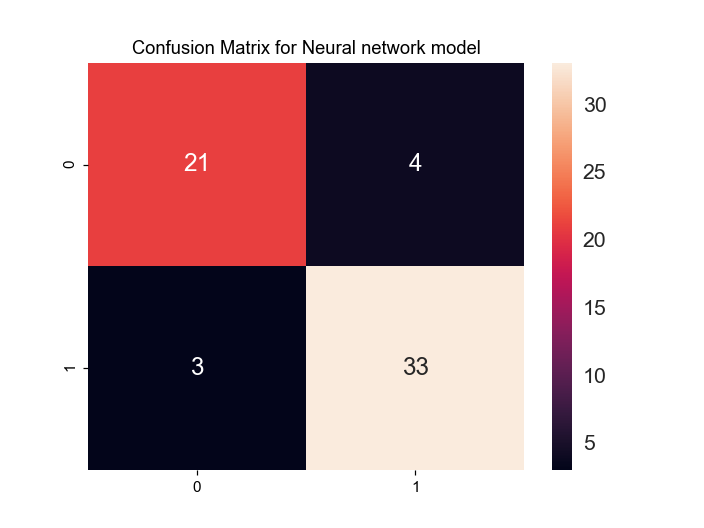

<IPython.core.display.Javascript object>


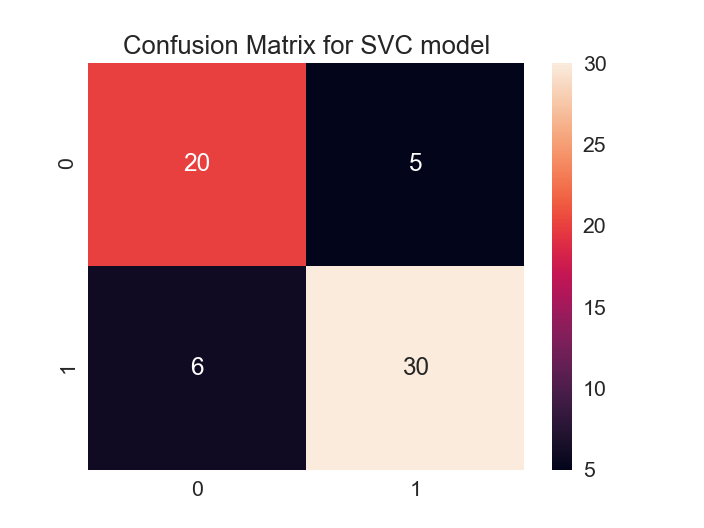

<IPython.core.display.Javascript object>


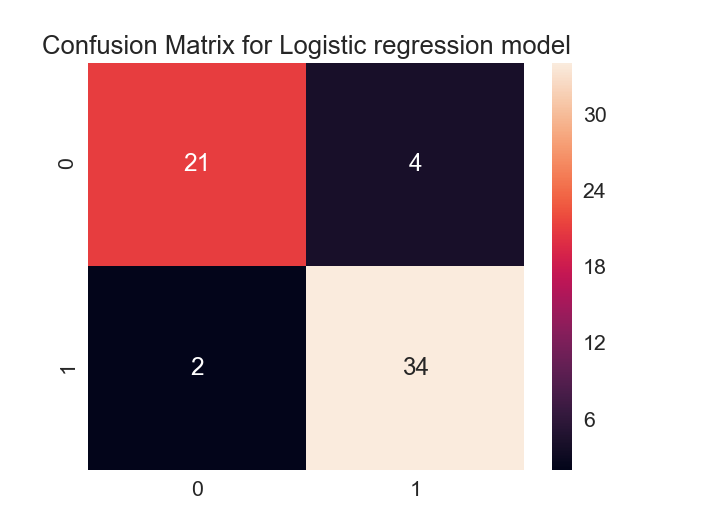

In [9]:
cm1=confusion_matrix(y_test,k1)
cm2=confusion_matrix(y_test,k2)
cm3=confusion_matrix(y_test,k3)

plt.figure()
plt.title("Confusion Matrix for Neural network model")
df_cm = pd.DataFrame(cm1, range(2),range(2))
sn.set(font_scale=1.4)     #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}) # font size


plt.figure()
plt.title("Confusion Matrix for SVC model")
df_cm = pd.DataFrame(cm2, range(2),range(2))
sn.set(font_scale=1.4)     #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}) # font size


plt.figure()
plt.title("Confusion Matrix for Logistic regression model")
df_cm = pd.DataFrame(cm3, range(2),range(2))
sn.set(font_scale=1.4)     #for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}) # font size